<a href="https://colab.research.google.com/github/Paolino1994/IntroIA/blob/main/Integrador%20Clase%206/Softmax_MNIST_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.special import softmax
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [2]:
#Load Dataset
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


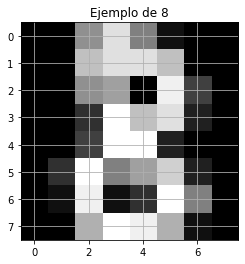

In [3]:
# Cargamos una muestra

plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')

In [4]:
#split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [51]:
# Seleccionar hiperparámetros

lr = 0.001
batchSize = 10
epochs = 1000
alpha = 0.001
momentum = 0.05


In [52]:
#Como tenemos multiples clases, SGD usa softmax classifier
#https://github.com/ageron/handson-ml/issues/431
model = SGDClassifier(loss="log", random_state=967,eta0=lr,max_iter=epochs,alpha=alpha,learning_rate="constant",verbose=True)
model.fit(X_train, y_train)
#clf.fit(X_train, y_train)
yhat=model.predict(X_test)


-- Epoch 1
Norm: 0.42, NNZs: 61, Bias: -0.003823, T: 1437, Avg. loss: 0.043523
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 61, Bias: -0.004657, T: 2874, Avg. loss: 0.014348
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 61, Bias: -0.005621, T: 4311, Avg. loss: 0.010806
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.61, NNZs: 61, Bias: -0.006100, T: 5748, Avg. loss: 0.008705
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.64, NNZs: 61, Bias: -0.006866, T: 7185, Avg. loss: 0.006780
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.67, NNZs: 61, Bias: -0.007037, T: 8622, Avg. loss: 0.006245
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.70, NNZs: 61, Bias: -0.007726, T: 10059, Avg. loss: 0.005334
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.72, NNZs: 61, Bias: -0.007951, T: 11496, Avg. loss: 0.004526
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.74, NNZs: 61, Bias: -0.008035, T: 12933, Avg. loss: 0.004490
Total 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [53]:
MSE=(sum(yhat-y_test)**2)/len(yhat)
score=np.count_nonzero(yhat-y_test==0)
print("MSE",MSE)
print("Score",score/len(yhat))

MSE 3.2111111111111112
Score 0.9666666666666667
